#Import all necessary libraries

In [ ]:
#import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import re
from sklearn import model_selection,preprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm

#Download the dataset

In [ ]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chomd 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
/bin/bash: chomd: command not found


In [ ]:
# download the required dataset from kaggle 
!kaggle datasets download -d dorbicycle/world-foodfeed-production

  0% 0.00/874k [00:00<?, ?B/s]
100% 874k/874k [00:00<00:00, 155MB/s]


In [ ]:
! unzip "/content/world-foodfeed-production.zip"

Archive:  /content/world-foodfeed-production.zip
  inflating: FAO.csv                 


# Read data from CSV file

In [ ]:
#read data from csv file
data=pd.read_csv('/content/FAO.csv',encoding='latin-1')

In [ ]:

data#show the data

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
#Drop the columns that are not required.
dro=['Area Abbreviation','Area Code','Item Code','Element Code' ,'Unit','latitude','longitude']
data.drop(columns=dro,axis=1,inplace=True)

In [ ]:
#using query in Area,Element and city Item
data=data[(data['Area']=='Iraq') & (data['Element']=='Feed') & (data['Item']=='Barley and products')]

In [ ]:
data#show the new data

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
9416,Iraq,Barley and products,Feed,467.0,368.0,347.0,207.0,262.0,269.0,431.0,...,358.0,388.0,446.0,453.0,448.0,377.0,605.0,413.0,519,672


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 9416 to 9416
Data columns (total 56 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     1 non-null      object 
 1   Item     1 non-null      object 
 2   Element  1 non-null      object 
 3   Y1961    1 non-null      float64
 4   Y1962    1 non-null      float64
 5   Y1963    1 non-null      float64
 6   Y1964    1 non-null      float64
 7   Y1965    1 non-null      float64
 8   Y1966    1 non-null      float64
 9   Y1967    1 non-null      float64
 10  Y1968    1 non-null      float64
 11  Y1969    1 non-null      float64
 12  Y1970    1 non-null      float64
 13  Y1971    1 non-null      float64
 14  Y1972    1 non-null      float64
 15  Y1973    1 non-null      float64
 16  Y1974    1 non-null      float64
 17  Y1975    1 non-null      float64
 18  Y1976    1 non-null      float64
 19  Y1977    1 non-null      float64
 20  Y1978    1 non-null      float64
 21  Y1979    1 non

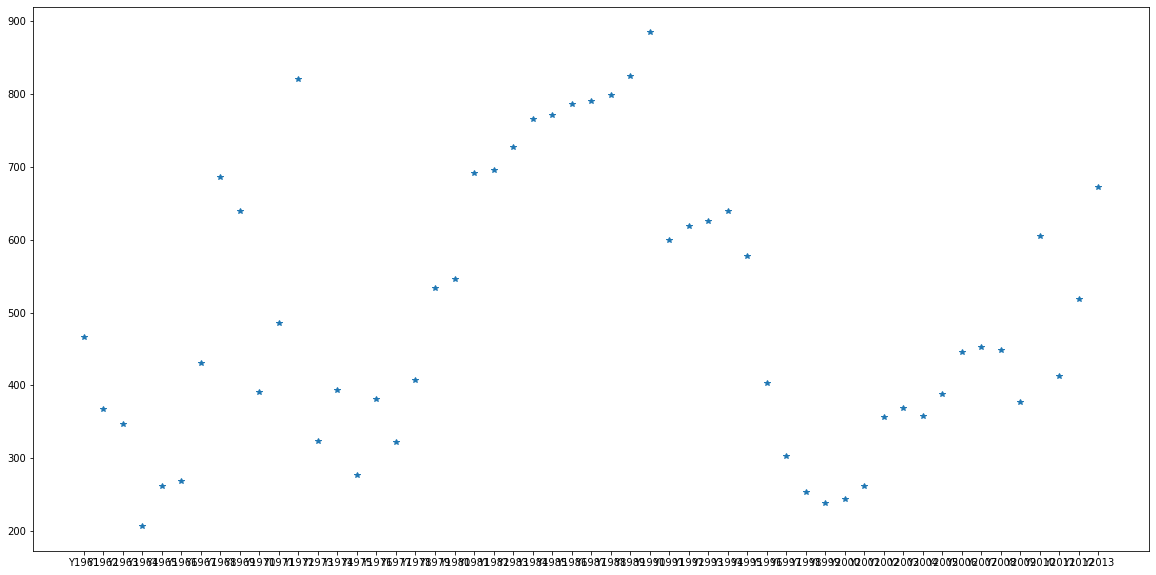

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data.iloc[0][3:],'*')

In [ ]:
inputs=data.iloc[0][3:].to_numpy()

In [ ]:
inputs

array([467.0, 368.0, 347.0, 207.0, 262.0, 269.0, 431.0, 686.0, 639.0,
       391.0, 486.0, 821.0, 324.0, 394.0, 277.0, 381.0, 322.0, 408.0,
       533.0, 546.0, 691.0, 695.0, 727.0, 765.0, 771.0, 786.0, 790.0,
       799.0, 824.0, 885.0, 599.0, 619.0, 625.0, 639.0, 578.0, 403.0,
       303.0, 254.0, 238.0, 244.0, 262.0, 356.0, 369.0, 358.0, 388.0,
       446.0, 453.0, 448.0, 377.0, 605.0, 413.0, 519, 672], dtype=object)

In [ ]:
#normaliz to data
x_normalizer = preprocessing.MinMaxScaler()
x_normalizer.fit(inputs.reshape(-1,1))
x_norm = x_normalizer.transform(inputs.reshape(-1,1))

In [ ]:
x_norm

array([[0.38348083],
       [0.23746313],
       [0.20648968],
       [0.        ],
       [0.08112094],
       [0.09144543],
       [0.33038348],
       [0.70648968],
       [0.63716814],
       [0.27138643],
       [0.41150442],
       [0.90560472],
       [0.17256637],
       [0.27581121],
       [0.10324484],
       [0.25663717],
       [0.16961652],
       [0.29646018],
       [0.48082596],
       [0.5       ],
       [0.71386431],
       [0.71976401],
       [0.76696165],
       [0.82300885],
       [0.83185841],
       [0.8539823 ],
       [0.85988201],
       [0.87315634],
       [0.9100295 ],
       [1.        ],
       [0.57817109],
       [0.60766962],
       [0.61651917],
       [0.63716814],
       [0.54719764],
       [0.28908555],
       [0.14159292],
       [0.06932153],
       [0.04572271],
       [0.05457227],
       [0.08112094],
       [0.21976401],
       [0.23893805],
       [0.22271386],
       [0.26696165],
       [0.35250737],
       [0.36283186],
       [0.355

#Create the time series dataset using Time Series Data Generator

In [ ]:
time_series=tf.keras.preprocessing.sequence.TimeseriesGenerator(x_norm,
                                                                 inputs,length=5,
                                                               batch_size=16)

In [ ]:
# get the first batch of the dataset
x,y=time_series[0]

In [ ]:

x[:3]

array([[[0.38348083],
        [0.23746313],
        [0.20648968],
        [0.        ],
        [0.08112094]],

       [[0.23746313],
        [0.20648968],
        [0.        ],
        [0.08112094],
        [0.09144543]],

       [[0.20648968],
        [0.        ],
        [0.08112094],
        [0.09144543],
        [0.33038348]]])

In [ ]:

y[:2]

array([269., 431.])

In [ ]:

print(x.shape)# print the shape of the dataset
print(y.shape)

(16, 5, 1)
(16,)


In [ ]:
#Create data from the generator and split the data into training and testing
x_data=np.array([])
y_data=np.array([])
for x,y in tqdm(time_series):
  x_data=np.append(x_data,x)
  y_data=np.append(y_data,y)

100%|██████████| 3/3 [00:00<00:00, 6496.08it/s]


In [ ]:
print(x_data.shape)
print(y_data.shape)


(240,)
(48,)


#Make sure the data shape is (batch_size,length,1) and the target shape is (batch_size,1)

In [ ]:
x=x_data.reshape(-1,5,1)
y=y_data.reshape(-1,1)
print(x.shape)
print(y.shape)

(48, 5, 1)
(48, 1)


In [ ]:
# get the max value of the dataset
x_normalizer.data_max_

array([885.])

In [ ]:
# get the min value of the dataset
x_normalizer.data_min_

array([207.])

#  Create the Data Pipeline

In [ ]:
def creater_pipline(x,y):
  data=tf.data.Dataset.from_tensor_slices((x,y))
  data=data.shuffle(20,reshuffle_each_iteration=True)
  data=data.batch(16)
  data=data.prefetch(tf.data.AUTOTUNE)
  return data
train_dataset=creater_pipline(x[:-40],y[:-40])

## Create the Forcasting Model

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Input((5, 1)),
        tf.keras.layers.Conv1D(filters=
            16, kernel_size=3, padding="causal", activation=tf.nn.leaky_relu),
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(1,activation=tf.nn.sigmoid),
        tf.keras.layers.Lambda(lambda x:(x * (x_normalizer.data_max_ - x_normalizer.data_min_) + x_normalizer.data_min_)),
    ])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.Huber())
model=model.fit(train_dataset,epochs=100,validation_data=(x[-40:],y[-40:]))

Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 168.5594 - val_loss: 163.4258
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 167.7949 - val_loss: 163.6980
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 167.0357 - val_loss: 163.9693
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 166.2787 - val_loss: 164.3130
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 165.5200 - val_loss: 164.6909
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 164.7556 - val_loss: 165.0710
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 163.9827 - val_loss: 165.4536
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 163.2012 - val_loss: 165.8396
Epoch 9/100
1/1 [==============================] - 0s 33ms/step - loss: 162.4079 - val_loss: 166.2997
Epoch 10/100
1/1 [==============================] - 0s 30ms/step - loss: 161.5987 

In [ ]:
#create model_2
model_2=tf.keras.Sequential([
                             tf.keras.layers.Input((5,1)),
                             tf.keras.layers.Conv1D(filters=16,kernel_size=3,padding='causal',activation=tf.nn.relu),
                   
                             tf.keras.layers.GRU(64),
                             tf.keras.layers.Dense(1,activation=tf.nn.sigmoid),
                             tf.keras.layers.Lambda(lambda x:(x * (x_normalizer.data_max_- x_normalizer.data_min_) + x_normalizer.data_min_))
                      

])

In [ ]:
model_2.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.Huber())
model_2.fit(train_dataset,epochs=100,validation_data=(x[-40:],y[-40:]))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 168.0048 - val_loss: 165.1847
Epoch 2/100
1/1 [==============================] - 0s 46ms/step - loss: 166.3191 - val_loss: 166.1404
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 164.6366 - val_loss: 167.1015
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 162.9458 - val_loss: 168.2774
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 161.2356 - val_loss: 169.5188
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 159.4964 - val_loss: 171.0679
Epoch 7/100
1/1 [==============================] - 0s 29ms/step - loss: 157.7206 - val_loss: 172.6312
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 155.9002 - val_loss: 174.2038
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 154.0264 - val_loss: 175.7835
Epoch 10/100
1/1 [==============================] - 0s 44ms/step - loss: 152.3334 - 

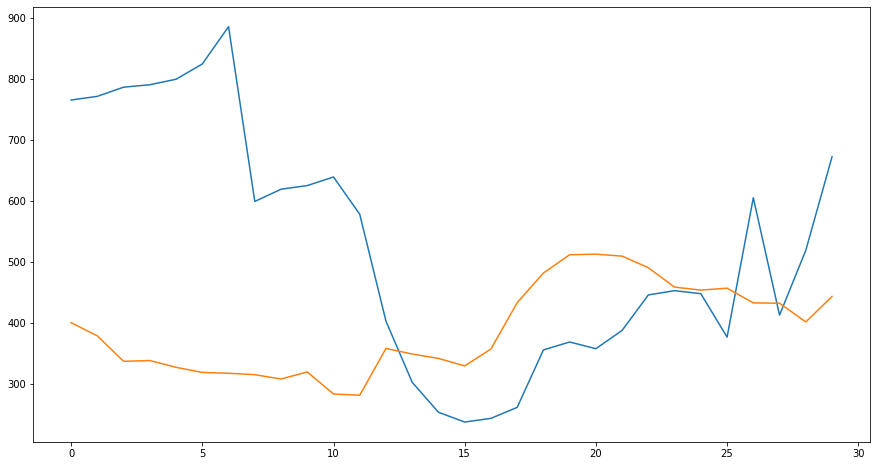

In [ ]:

pred=model_2.predict(x[-30:])
plt.figure(figsize=(15,8))
true_y=y[-30:]
plt.plot(true_y)
plt.plot(pred.reshape(-1))

In [ ]:
#create model_3
model_3=tf.keras.Sequential([
                             tf.keras.layers.Input((5,1)),
                             tf.keras.layers.Conv1D(filters=16,kernel_size=3,padding='causal',
                                                    activation=tf.nn.leaky_relu),
                             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(8)),
                             tf.keras.layers.Dense(1,activation=tf.nn.sigmoid),
                             tf.keras.layers.Lambda(lambda x: x * 885)




])


In [ ]:
model_3.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.Huber())
save_best_model=tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/saved/my_model_forcasting"
)
model_3.fit(train_dataset,epochs=100,validation_data=(x[-40:],y[-40:]),callbacks=[save_best_model])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 154.2829

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 27s 27s/step - loss: 154.2829 - val_loss: 155.6220
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 154.0580

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 154.0580 - val_loss: 155.4887
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 153.8339

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 153.8339 - val_loss: 155.3552
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 153.6108

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 153.6108 - val_loss: 155.2183
Epoch 5/100
1/1 [==============================] - ETA: 0s - loss: 153.3895

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 153.3895 - val_loss: 155.0774
Epoch 6/100
1/1 [==============================] - ETA: 0s - loss: 153.1680

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 153.1680 - val_loss: 154.9368
Epoch 7/100
1/1 [==============================] - ETA: 0s - loss: 152.9480

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 152.9480 - val_loss: 154.7955
Epoch 8/100
1/1 [==============================] - ETA: 0s - loss: 152.7295

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 152.7295 - val_loss: 154.6539
Epoch 9/100
1/1 [==============================] - ETA: 0s - loss: 152.5116

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 152.5116 - val_loss: 154.5107
Epoch 10/100
1/1 [==============================] - ETA: 0s - loss: 152.2942

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 152.2942 - val_loss: 154.3712
Epoch 11/100
1/1 [==============================] - ETA: 0s - loss: 152.0811

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 152.0811 - val_loss: 154.2328
Epoch 12/100
1/1 [==============================] - ETA: 0s - loss: 151.8698

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 151.8698 - val_loss: 154.0969
Epoch 13/100
1/1 [==============================] - ETA: 0s - loss: 151.6600

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 151.6600 - val_loss: 153.9657
Epoch 14/100
1/1 [==============================] - ETA: 0s - loss: 151.4546

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 151.4546 - val_loss: 153.8349
Epoch 15/100
1/1 [==============================] - ETA: 0s - loss: 151.2636

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 151.2636 - val_loss: 153.7032
Epoch 16/100
1/1 [==============================] - ETA: 0s - loss: 151.0740

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 151.0740 - val_loss: 153.5706
Epoch 17/100
1/1 [==============================] - ETA: 0s - loss: 150.8821

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 150.8821 - val_loss: 153.4357
Epoch 18/100
1/1 [==============================] - ETA: 0s - loss: 150.6908

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 150.6908 - val_loss: 153.3005
Epoch 19/100
1/1 [==============================] - ETA: 0s - loss: 150.5011

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 150.5011 - val_loss: 153.1652
Epoch 20/100
1/1 [==============================] - ETA: 0s - loss: 150.3106

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 150.3106 - val_loss: 153.0296
Epoch 21/100
1/1 [==============================] - ETA: 0s - loss: 150.1199

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 150.1199 - val_loss: 152.8887
Epoch 22/100
1/1 [==============================] - ETA: 0s - loss: 149.9351

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 149.9351 - val_loss: 152.7474
Epoch 23/100
1/1 [==============================] - ETA: 0s - loss: 149.7534

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 149.7534 - val_loss: 152.6076
Epoch 24/100
1/1 [==============================] - ETA: 0s - loss: 149.5707

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 149.5707 - val_loss: 152.4659
Epoch 25/100
1/1 [==============================] - ETA: 0s - loss: 149.3854

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 149.3854 - val_loss: 152.3217
Epoch 26/100
1/1 [==============================] - ETA: 0s - loss: 149.1985

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 149.1985 - val_loss: 152.1756
Epoch 27/100
1/1 [==============================] - ETA: 0s - loss: 149.0126

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 149.0126 - val_loss: 152.0258
Epoch 28/100
1/1 [==============================] - ETA: 0s - loss: 148.8275

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 148.8275 - val_loss: 151.8719
Epoch 29/100
1/1 [==============================] - ETA: 0s - loss: 148.6396

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 148.6396 - val_loss: 151.7157
Epoch 30/100
1/1 [==============================] - ETA: 0s - loss: 148.4504

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 148.4504 - val_loss: 151.5577
Epoch 31/100
1/1 [==============================] - ETA: 0s - loss: 148.2598

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 148.2598 - val_loss: 151.4144
Epoch 32/100
1/1 [==============================] - ETA: 0s - loss: 148.0673

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 148.0673 - val_loss: 151.2682
Epoch 33/100
1/1 [==============================] - ETA: 0s - loss: 147.8721

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 147.8721 - val_loss: 151.1185
Epoch 34/100
1/1 [==============================] - ETA: 0s - loss: 147.6743

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 147.6743 - val_loss: 150.9630
Epoch 35/100
1/1 [==============================] - ETA: 0s - loss: 147.4733

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 147.4733 - val_loss: 150.8085
Epoch 36/100
1/1 [==============================] - ETA: 0s - loss: 147.2689

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 147.2689 - val_loss: 150.6494
Epoch 37/100
1/1 [==============================] - ETA: 0s - loss: 147.0610

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 147.0610 - val_loss: 150.4848
Epoch 38/100
1/1 [==============================] - ETA: 0s - loss: 146.8494

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 146.8494 - val_loss: 150.3160
Epoch 39/100
1/1 [==============================] - ETA: 0s - loss: 146.6366

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 146.6366 - val_loss: 150.1722
Epoch 40/100
1/1 [==============================] - ETA: 0s - loss: 146.4185

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 146.4185 - val_loss: 150.0215
Epoch 41/100
1/1 [==============================] - ETA: 0s - loss: 146.1981

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 146.1981 - val_loss: 149.8627
Epoch 42/100
1/1 [==============================] - ETA: 0s - loss: 145.9745

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 145.9745 - val_loss: 149.6960
Epoch 43/100
1/1 [==============================] - ETA: 0s - loss: 145.7483

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 145.7483 - val_loss: 149.5212
Epoch 44/100
1/1 [==============================] - ETA: 0s - loss: 145.5189

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 145.5189 - val_loss: 149.3419
Epoch 45/100
1/1 [==============================] - ETA: 0s - loss: 145.2838

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 145.2838 - val_loss: 149.1562
Epoch 46/100
1/1 [==============================] - ETA: 0s - loss: 145.0377

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 145.0377 - val_loss: 148.9638
Epoch 47/100
1/1 [==============================] - ETA: 0s - loss: 144.7835

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 144.7835 - val_loss: 148.7647
Epoch 48/100
1/1 [==============================] - ETA: 0s - loss: 144.5295

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 144.5295 - val_loss: 148.6536
Epoch 49/100
1/1 [==============================] - ETA: 0s - loss: 144.2648

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 144.2648 - val_loss: 148.5526
Epoch 50/100
1/1 [==============================] - ETA: 0s - loss: 144.1079

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 144.1079 - val_loss: 148.2663
Epoch 51/100
1/1 [==============================] - ETA: 0s - loss: 143.9970

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 143.9970 - val_loss: 148.5067
Epoch 52/100
1/1 [==============================] - ETA: 0s - loss: 143.7199

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 143.7199 - val_loss: 148.8932
Epoch 53/100
1/1 [==============================] - ETA: 0s - loss: 143.6747

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 143.6747 - val_loss: 149.0871
Epoch 54/100
1/1 [==============================] - ETA: 0s - loss: 143.4020

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 143.4020 - val_loss: 149.2990
Epoch 55/100
1/1 [==============================] - ETA: 0s - loss: 143.2403

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 143.2403 - val_loss: 149.8238
Epoch 56/100
1/1 [==============================] - ETA: 0s - loss: 142.9712

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 142.9712 - val_loss: 150.5206
Epoch 57/100
1/1 [==============================] - ETA: 0s - loss: 142.7610

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 142.7610 - val_loss: 151.0678
Epoch 58/100
1/1 [==============================] - ETA: 0s - loss: 142.5622

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 142.5622 - val_loss: 151.4704
Epoch 59/100
1/1 [==============================] - ETA: 0s - loss: 142.3304

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 142.3304 - val_loss: 151.8854
Epoch 60/100
1/1 [==============================] - ETA: 0s - loss: 142.1757

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 142.1757 - val_loss: 152.3943
Epoch 61/100
1/1 [==============================] - ETA: 0s - loss: 141.9693

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 141.9693 - val_loss: 152.9245
Epoch 62/100
1/1 [==============================] - ETA: 0s - loss: 141.7675

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 141.7675 - val_loss: 153.3934
Epoch 63/100
1/1 [==============================] - ETA: 0s - loss: 141.5614

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 141.5614 - val_loss: 153.7913
Epoch 64/100
1/1 [==============================] - ETA: 0s - loss: 141.3456

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 141.3456 - val_loss: 154.1089
Epoch 65/100
1/1 [==============================] - ETA: 0s - loss: 141.1109

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 141.1109 - val_loss: 154.3556
Epoch 66/100
1/1 [==============================] - ETA: 0s - loss: 140.8559

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 140.8559 - val_loss: 154.5491
Epoch 67/100
1/1 [==============================] - ETA: 0s - loss: 140.6169

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 140.6169 - val_loss: 154.8686
Epoch 68/100
1/1 [==============================] - ETA: 0s - loss: 140.3553

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 140.3553 - val_loss: 155.2827
Epoch 69/100
1/1 [==============================] - ETA: 0s - loss: 140.1136

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 140.1136 - val_loss: 155.6389
Epoch 70/100
1/1 [==============================] - ETA: 0s - loss: 139.8685

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 139.8685 - val_loss: 155.9598
Epoch 71/100
1/1 [==============================] - ETA: 0s - loss: 139.6054

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 139.6054 - val_loss: 156.4168
Epoch 72/100
1/1 [==============================] - ETA: 0s - loss: 139.3402

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 139.3402 - val_loss: 157.0417
Epoch 73/100
1/1 [==============================] - ETA: 0s - loss: 139.0432

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 139.0432 - val_loss: 157.6878
Epoch 74/100
1/1 [==============================] - ETA: 0s - loss: 138.7510

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 138.7510 - val_loss: 158.2762
Epoch 75/100
1/1 [==============================] - ETA: 0s - loss: 138.4223

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 138.4223 - val_loss: 158.9043
Epoch 76/100
1/1 [==============================] - ETA: 0s - loss: 138.1061

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 138.1061 - val_loss: 159.6376
Epoch 77/100
1/1 [==============================] - ETA: 0s - loss: 137.7713

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 137.7713 - val_loss: 160.3571
Epoch 78/100
1/1 [==============================] - ETA: 0s - loss: 137.4590

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 137.4590 - val_loss: 160.9462
Epoch 79/100
1/1 [==============================] - ETA: 0s - loss: 137.1167

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 137.1167 - val_loss: 161.5085
Epoch 80/100
1/1 [==============================] - ETA: 0s - loss: 136.7776

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 136.7776 - val_loss: 162.1455
Epoch 81/100
1/1 [==============================] - ETA: 0s - loss: 136.4124

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 136.4124 - val_loss: 162.7558
Epoch 82/100
1/1 [==============================] - ETA: 0s - loss: 136.0530

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 136.0530 - val_loss: 163.2723
Epoch 83/100
1/1 [==============================] - ETA: 0s - loss: 135.6671

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 135.6671 - val_loss: 163.8195
Epoch 84/100
1/1 [==============================] - ETA: 0s - loss: 135.2823

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 135.2823 - val_loss: 164.4814
Epoch 85/100
1/1 [==============================] - ETA: 0s - loss: 134.8839

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 134.8839 - val_loss: 165.1792
Epoch 86/100
1/1 [==============================] - ETA: 0s - loss: 134.4781

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 134.4781 - val_loss: 165.8731
Epoch 87/100
1/1 [==============================] - ETA: 0s - loss: 134.0509

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 134.0509 - val_loss: 166.6555
Epoch 88/100
1/1 [==============================] - ETA: 0s - loss: 133.6118

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 11s 11s/step - loss: 133.6118 - val_loss: 167.5279
Epoch 89/100
1/1 [==============================] - ETA: 0s - loss: 133.1642

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 133.1642 - val_loss: 168.3563
Epoch 90/100
1/1 [==============================] - ETA: 0s - loss: 132.7082

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 132.7082 - val_loss: 169.1204
Epoch 91/100
1/1 [==============================] - ETA: 0s - loss: 132.2465

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 132.2465 - val_loss: 169.9138
Epoch 92/100
1/1 [==============================] - ETA: 0s - loss: 131.7577

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 131.7577 - val_loss: 170.6809
Epoch 93/100
1/1 [==============================] - ETA: 0s - loss: 131.2532

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 131.2532 - val_loss: 171.3696
Epoch 94/100
1/1 [==============================] - ETA: 0s - loss: 130.7322

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 130.7322 - val_loss: 172.1087
Epoch 95/100
1/1 [==============================] - ETA: 0s - loss: 130.2059

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 130.2059 - val_loss: 172.9384
Epoch 96/100
1/1 [==============================] - ETA: 0s - loss: 129.6645

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 129.6645 - val_loss: 173.8433
Epoch 97/100
1/1 [==============================] - ETA: 0s - loss: 129.1094

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 129.1094 - val_loss: 174.9399
Epoch 98/100
1/1 [==============================] - ETA: 0s - loss: 128.5484

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 128.5484 - val_loss: 176.2888
Epoch 99/100
1/1 [==============================] - ETA: 0s - loss: 127.9691

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 127.9691 - val_loss: 177.6269
Epoch 100/100
1/1 [==============================] - ETA: 0s - loss: 127.3693

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved/my_model_forcasting/assets


1/1 [==============================] - 10s 10s/step - loss: 127.3693 - val_loss: 179.0537


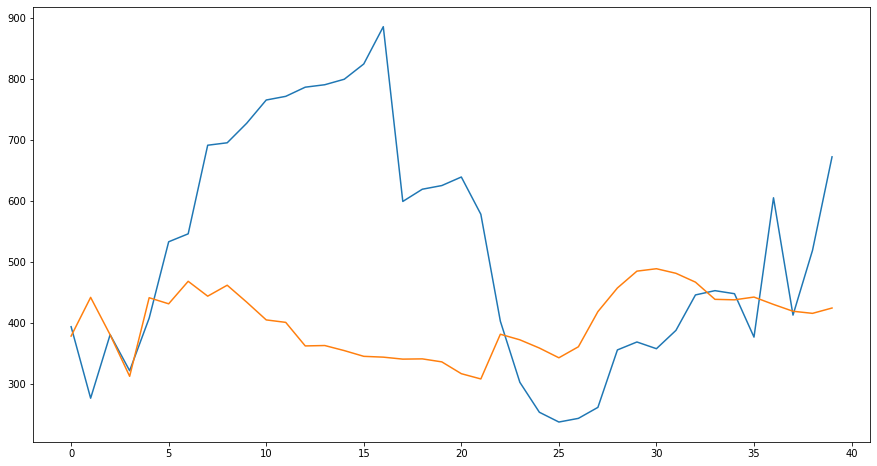

In [ ]:
pred=model_3.predict(x[-40:])
plt.figure(figsize=(15,8))
true_y=y[-40:]
plt.plot(true_y)
plt.plot(pred.reshape(-1))

In [ ]:

x[-1]

array([[0.35545723],
       [0.25073746],
       [0.58702065],
       [0.30383481],
       [0.46017699]])

In [ ]:

b=([[0.35545723],
       [0.25073746],
       [0.58702065],
       [0.30383481],
       [0.46017699]])

def make_pred(x,years=1):
    pred_list=[]
    for i in range(years):
        
        pred = model_3.predict([x])
        pred_list.append(pred.reshape(-1)[0])
        x.pop(0)
        x.append([pred[0][0]/3200])
       
    return pred_list

pred =make_pred(b)
true_y=y[-1]
print(pred)
print(true_y)

[424.597]
[672.]


# Deployment

In [ ]:
! pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 19.5 MB/s 
     |████████████████████████████████| 212 kB 65.2 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 256 kB 61.7 MB/s 
     |████████████████████████████████| 1.1 MB 59.9 MB/s 
     |████████████████████████████████| 84 kB 4.4 MB/s 
     |████████████████████████████████| 54 kB 4.1 MB/s 
     |████████████████████████████████| 2.0 MB 61.7 MB/s 
     |████████████████████████████████| 271 kB 72.5 MB/s 
     |████████████████████████████████| 144 kB 73.6 MB/s 
     |████████████████████████████████| 94 kB 4.6 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 11.1 MB 56.0 MB/s 
     |████████████████████████████████| 80 kB 13.4 MB/s 
     |████████████████████████████████| 43 kB 2.9 MB/s 
     |████████████████████████████████| 62 

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np

In [ ]:
def make_pred(x1,x2,x3,x4,x5):
    x=np.array([x1,x2,x3,x4,x5])
    x=x_normalizer.transform(x.reshape(-1,1))
    x=x.reshape(-1,5,1)
        
    pred = model_3.predict(x)[0][0]             
    return pred

In [ ]:
make_pred(200,300,400,500,600)

501.05823

In [ ]:
demo=gr.Interface(fn=make_pred,inputs=[gr.inputs.Number(),
                                       gr.inputs.Number(),
                                       gr.inputs.Number(),
                                       gr.inputs.Number(),
                                       gr.inputs.Number()],outputs=['number'])

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [ ]:
demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://52476.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f0eb5af0250>,
 'http://127.0.0.1:7860/',
 'https://52476.gradio.app')